<style>
body {
    font-size: 20pt !important;
}

.rendered_html {
    font-size: 20pt !important;
}

.CodeMirror pre {
    font-size: 20pt !important;
}

.output pre {
    font-size: 20pt !important;
}
</style>


<h2 style="font-size:24pt"> Proyecto DESI</h2>

<h2 style="font-size:24pt"> Julio 2, 2025</h2>

<p style="font-size:16pt">
Creación de gráficas de distribuciones de ra,dec en un rango de z para todas las rosetas para el tipo de galaxia LRG (Luminous Red Galaxy)
</p>


## Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

In [3]:
# original files are found here https://data.desi.lbl.gov/public/edr/vac/edr/lss/v2.0/LSScats/clustering/
data = Table.read("https://data.desi.lbl.gov/public/edr/vac/edr/lss/v2.0/LSScats/clustering/LRG_N_clustering.dat.fits")
rand = Table.read("https://data.desi.lbl.gov/public/edr/vac/edr/lss/v2.0/LSScats/clustering/LRG_N_0_clustering.ran.fits")

In [4]:
data

RA,DEC,TARGETID,NTILE,TILES,Z,COMP_TILE,ROSETTE_NUMBER,ROSETTE_R,FRACZ_TILELOCID,BITWEIGHTS,PROB_OBS,WEIGHT_ZFAIL,WEIGHT,NZ,WEIGHT_FKP
deg,deg,,,,,,,deg,,,,,,h3 / Mpc3,
float64,float64,int64,int64,bytes51,float64,float64,int32,float64,float64,int64[2],float64,float64,float64,float64,float64
218.17242054901192,52.54211577658059,39633286401623197,1,163,0.7474303737185884,0.8333333333333334,6,1.6265395002176208,1.0,-1 .. -1,1.0,1.0,1.0,0.0006073340474539246,0.1455520198534496
217.94384586244482,53.30190604099312,39633297378116593,1,163,0.7213011019604519,0.8333333333333334,6,1.6779859944617077,1.0,6330467442111395959 .. 644021462684088648,0.4765625,1.0,2.0806451612903225,0.0005823912580269674,0.15084542533972659
217.94491107615283,53.25773967666818,39633297378116603,1,163,0.8915633095828486,0.8333333333333334,6,1.6585801478795874,1.0,-1 .. -1,1.0,1.0,1.0,0.0005723615213970424,0.15308410280969617
217.94818897430363,53.184679060489565,39633297378116632,1,163,0.571198929467844,0.8333333333333334,6,1.6294351488552072,1.0,5487684328256188688 .. -4673738684253924582,0.4140625,1.0,2.388888888888889,0.0005369919189708607,0.1615383650856205
215.8531155009324,54.149169507535355,39633311697469641,1,163,0.8391402600692351,0.8333333333333334,6,1.662595254479515,1.0,-1 .. -1,1.0,1.0,1.0,0.0006366829495309179,0.1397804201853648
214.53697625730607,52.53526414070296,39633286363874909,8,163-164-165-166-167-168-169-170,0.7189146534478316,1.0,6,0.5870722414716583,1.0,-1 .. -1,1.0,1.0,1.0,0.0005823912580269674,0.15084542533972659
215.82829092301523,51.04952001518059,39633263869822941,9,163-164-165-166-167-168-169-170-171,0.5929083369946472,1.0,6,1.46463021245029,1.0,-1 .. -1,1.0,1.0,1.0,0.0006106036532175123,0.14488555312656437
214.11604348164602,53.561400062885134,39633300955858767,9,163-164-165-166-167-168-169-170-171,0.7353161336815701,1.0,6,1.3487536192133718,1.0,-1 .. -1,1.0,1.0,1.0,0.0006073340474539246,0.1455520198534496


In [5]:
set(data['ROSETTE_NUMBER'])

{3, 6, 7, 11, 12, 13, 14, 15, 18, 19}

## Functions

In [6]:
conditions = list()
for i in set(data['ROSETTE_NUMBER']):
    number_rosette = data['ROSETTE_NUMBER'] == i
    conditions.append(number_rosette)

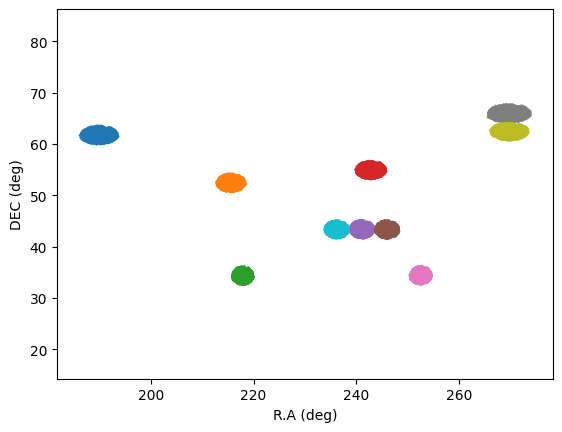

In [58]:
for i in conditions: 
    plt.scatter(data['RA'][i], data['DEC'][i], s=0.1)
    plt.axis('equal')  
    plt.xlabel('R.A (deg)')
    plt.ylabel('DEC (deg)')

In [132]:
def rosette_all(rosette):
    plot = plt.scatter(data['RA'][rosette], data['DEC'][rosette], s=0.1, c= '#D22042')
    plt.axis('equal') 
    plt.xlabel('R.A (deg)')
    plt.ylabel('DEC (deg)')

n = The values of the histogram bins\
bins = The edges of the bins\
patches = Container of individual artists used to create the histogram or list of such containers if there are multiple input datasets.

In [133]:
def max_value(rosette):

    n, bins, patches = plt.hist(data['Z'][rosette].flat,bins=10,color='#30C4C9')
    pos_max_bin = np.argmax(n)
    bin_center = (bins[pos_max_bin] + bins[pos_max_bin+1]) / 2
    left = bin_center - 0.03
    right = bin_center + 0.03
    
    return (left, bin_center, right)

In [134]:
def rosette(rosette,left,right):
    bounds = (data['Z']>left) & (data['Z']<right)
    plt.scatter(data['RA'][rosette&bounds], data['DEC'][rosette&bounds], s=5, c= '#24B694')
    plt.xlabel('R.A (deg)')
    plt.ylabel('DEC (deg)')
    plt.axis('equal')  

In [135]:
set(data['ROSETTE_NUMBER'])

{3, 6, 7, 11, 12, 13, 14, 15, 18, 19}

## Rosette 3

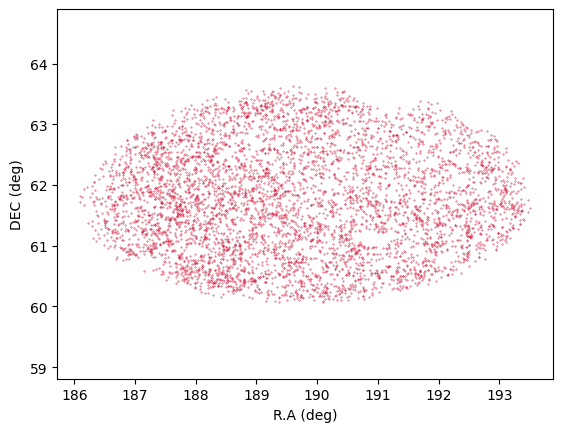

In [136]:
rosette_all(conditions[0])

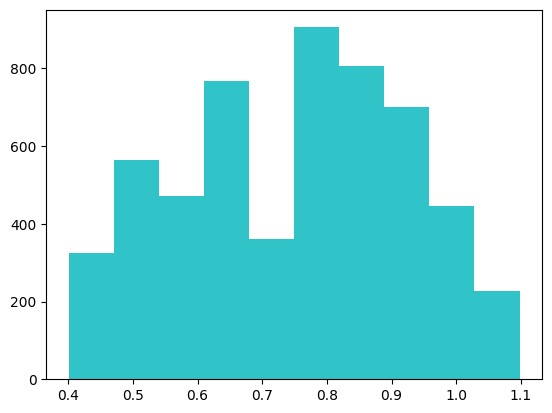

In [137]:
max_value_3 = max_value(conditions[0])

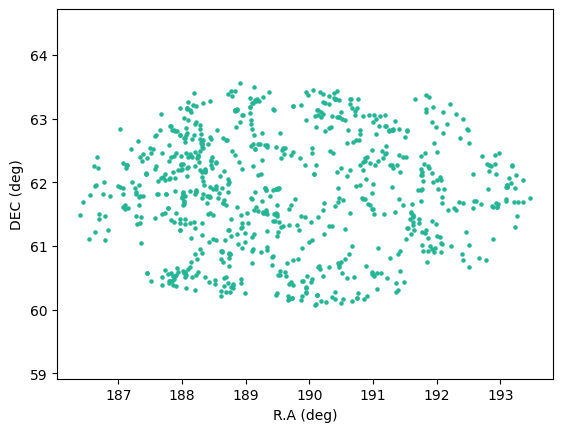

In [138]:
rosette(conditions[0],max_value_3[0],max_value_3[2])

## Rosette 6

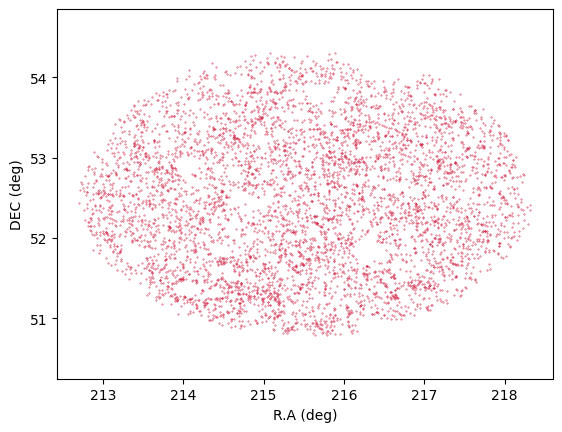

In [139]:
rosette_all(conditions[1])

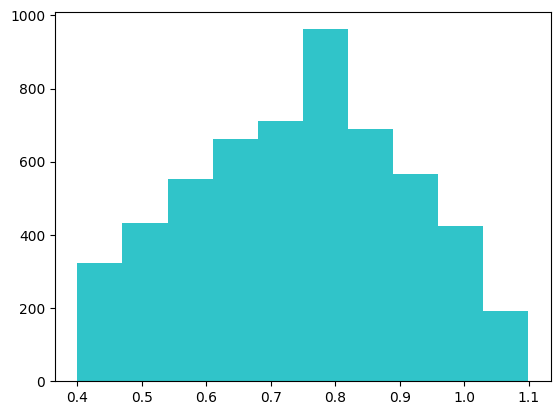

In [140]:
max_value_6 = max_value(conditions[1])

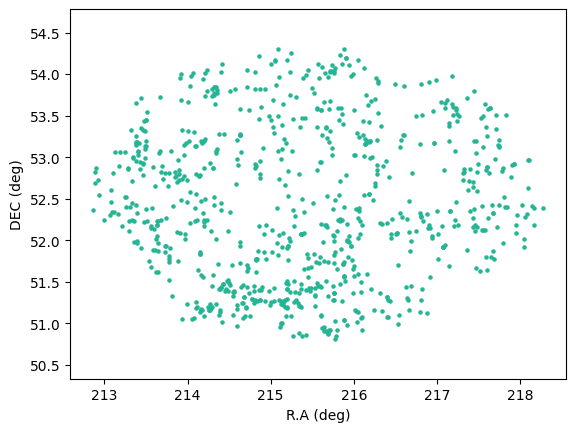

In [141]:
rosette(conditions[1],max_value_6[0],max_value_6[2])

## Rosette 7

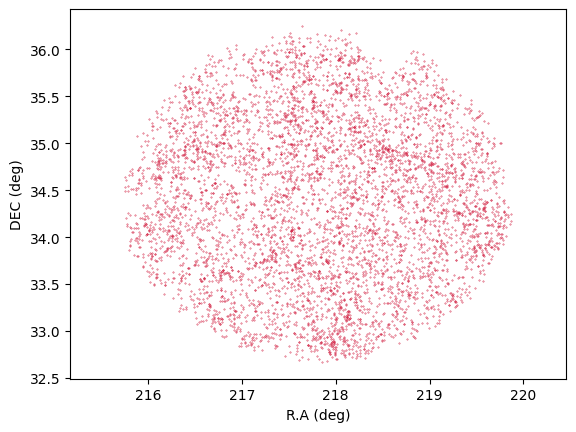

In [142]:
rosette_all(conditions[2])

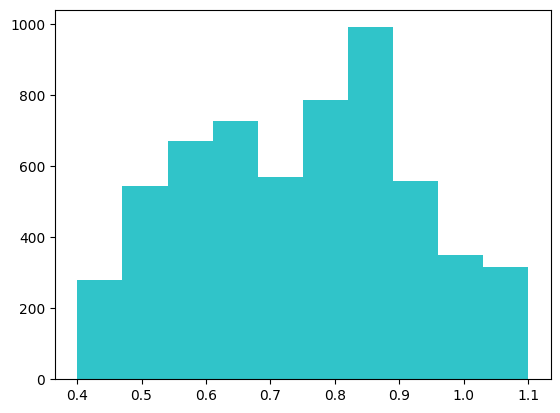

In [143]:
max_value_7 = max_value(conditions[2])

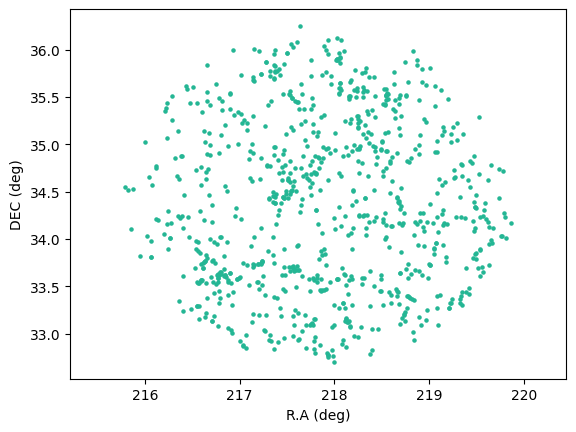

In [144]:
rosette(conditions[2],max_value_7[0],max_value_7[2])

## Rosette 11

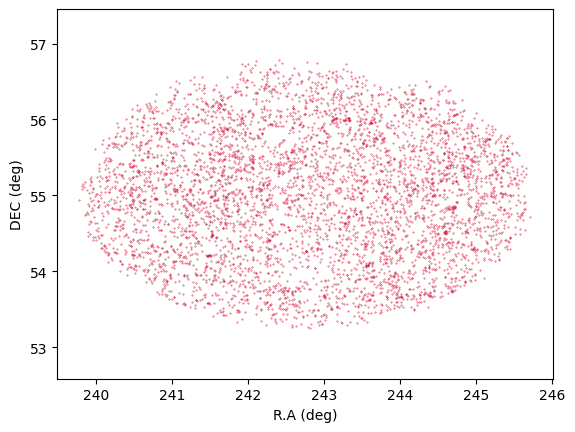

In [145]:
rosette_all(conditions[3])

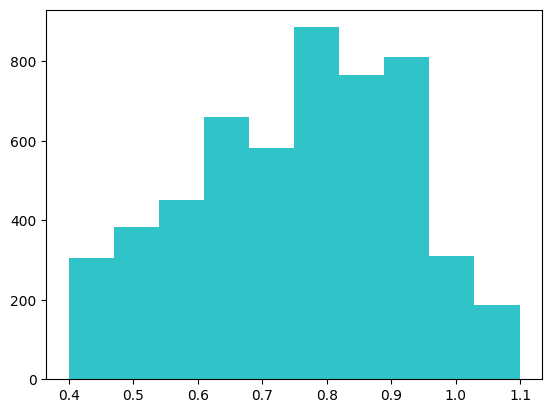

In [146]:
max_value_11 = max_value(conditions[3])

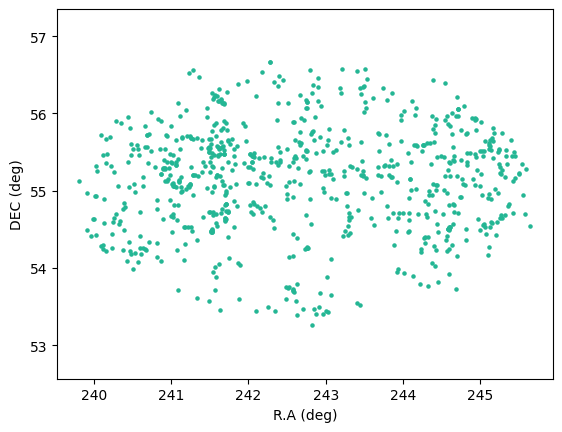

In [147]:
rosette(conditions[3],max_value_11[0],max_value_11[2])

## Rosette 12

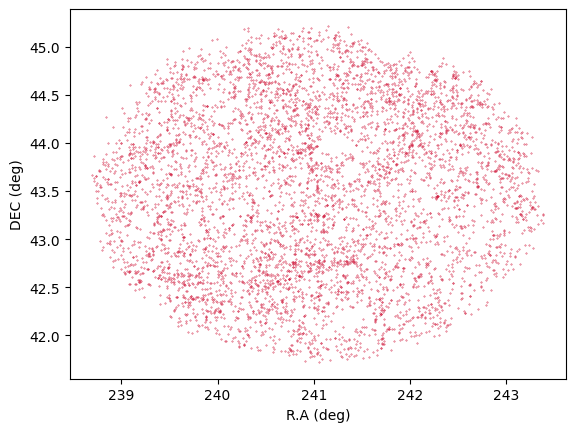

In [148]:
rosette_all(conditions[4])

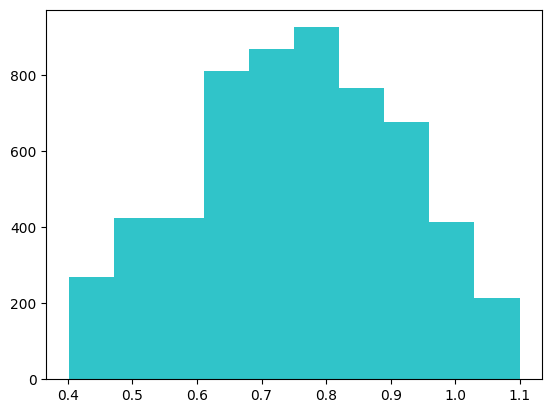

In [149]:
max_value_12 = max_value(conditions[4])

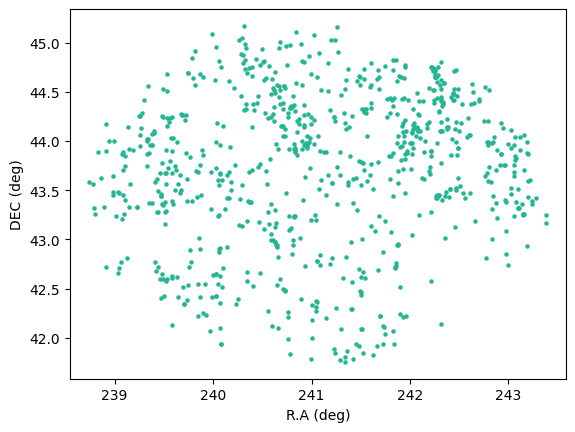

In [150]:
rosette(conditions[4],max_value_12[0],max_value_12[2])

## Rosette 13

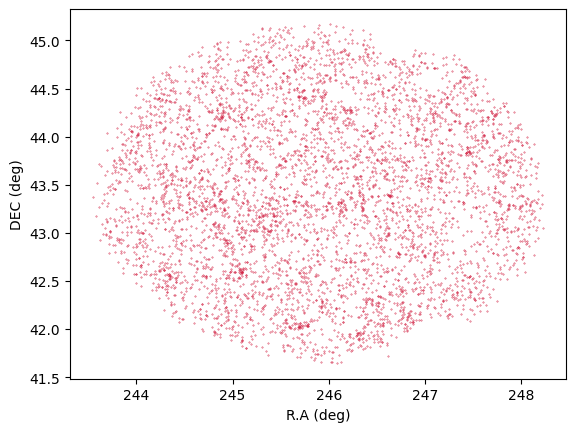

In [151]:
rosette_all(conditions[5])

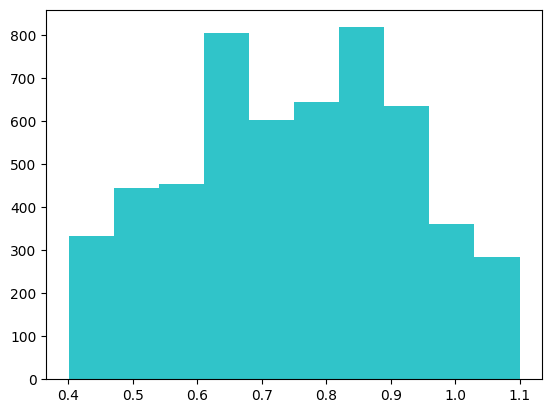

In [152]:
max_value_13 = max_value(conditions[5])

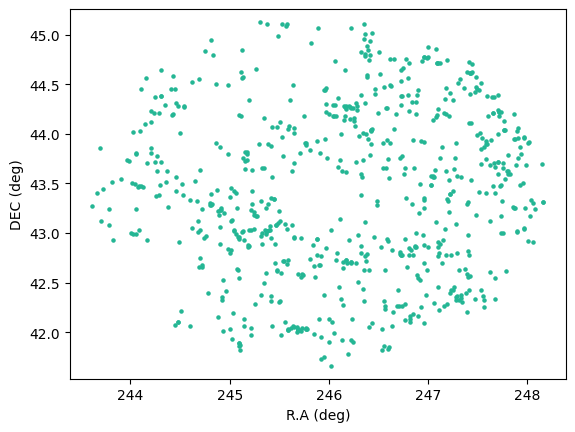

In [153]:
rosette(conditions[5],max_value_13[0],max_value_13[2])

## Rosette 14

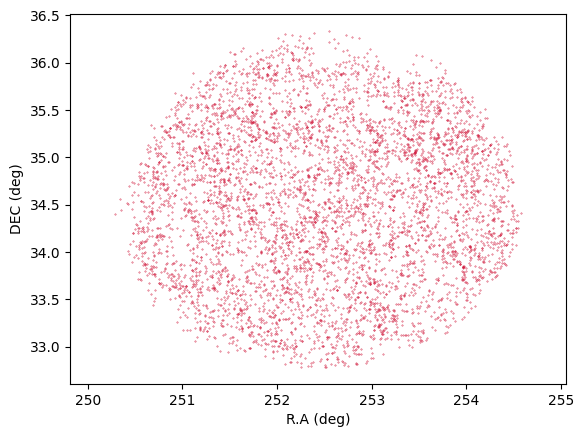

In [154]:
rosette_all(conditions[6])

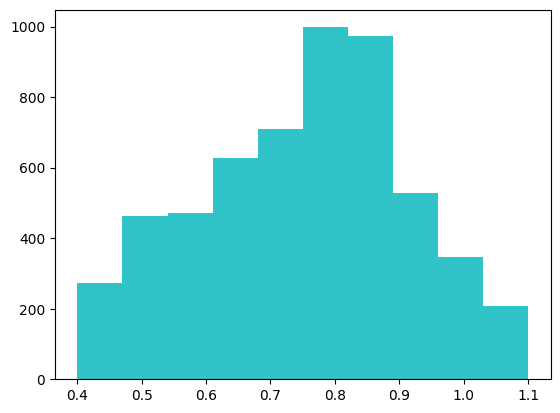

In [155]:
max_value_14 = max_value(conditions[6])

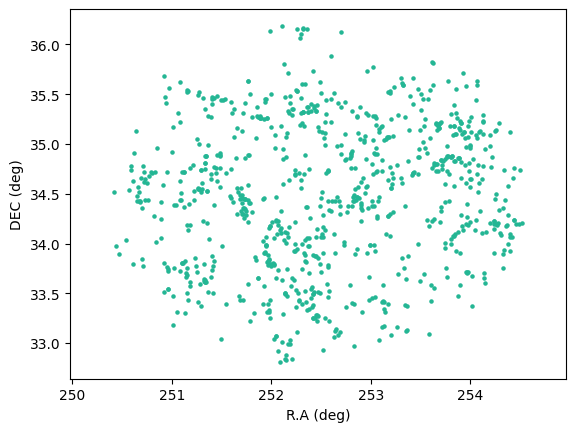

In [156]:
rosette(conditions[6],max_value_14[0],max_value_14[2])

## Rosette 15

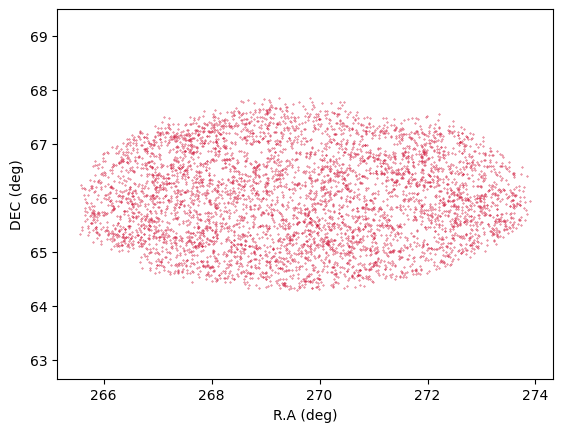

In [157]:
rosette_all(conditions[7])

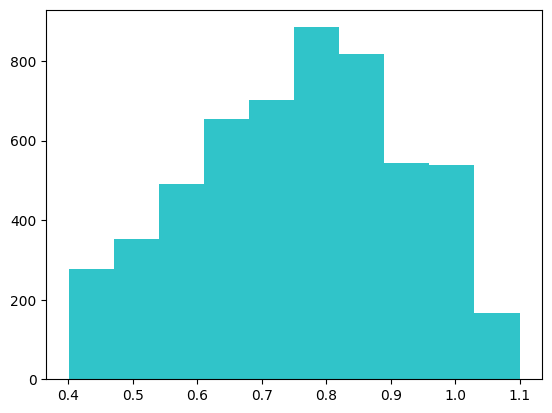

In [158]:
max_value_15 = max_value(conditions[7])

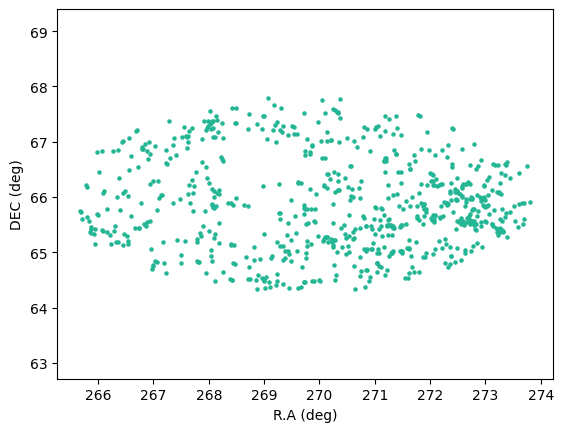

In [159]:
rosette(conditions[7],max_value_15[0],max_value_15[2])

## Rosette 18

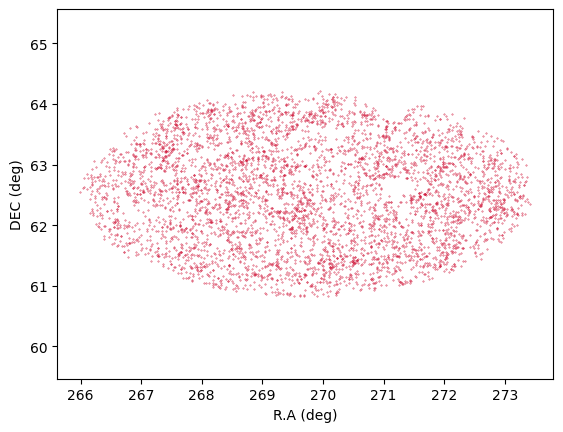

In [160]:
rosette_all(conditions[8])

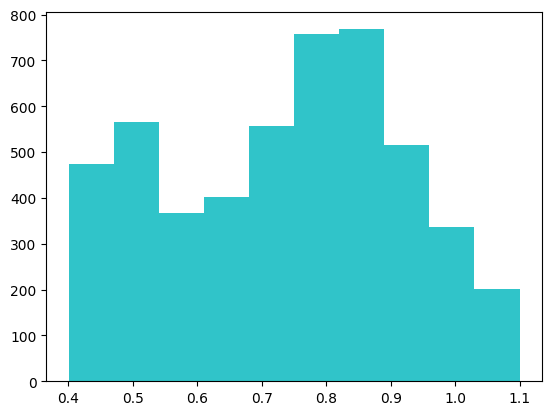

In [161]:
max_value_18 = max_value(conditions[8])

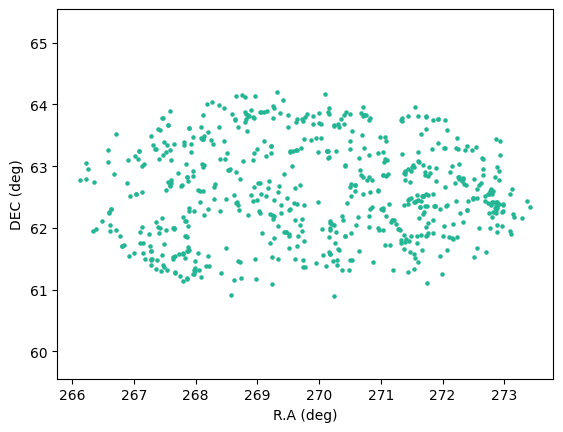

In [162]:
rosette(conditions[8],max_value_18[0],max_value_18[2])

## Rosette 19

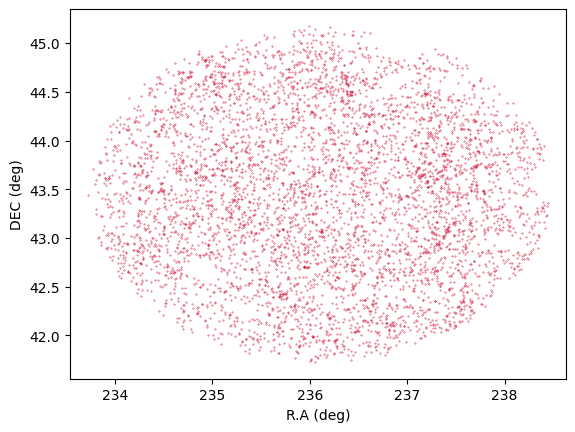

In [163]:
rosette_all(conditions[9])

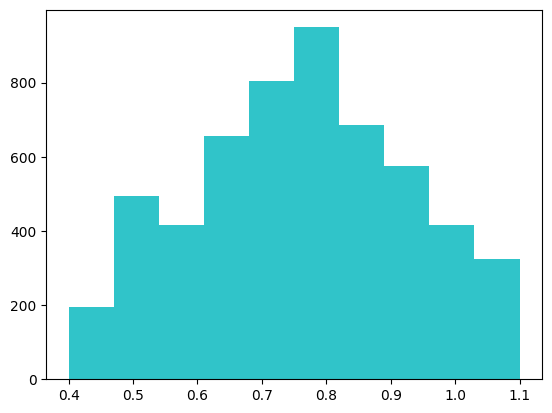

In [164]:
max_value_19 = max_value(conditions[9])

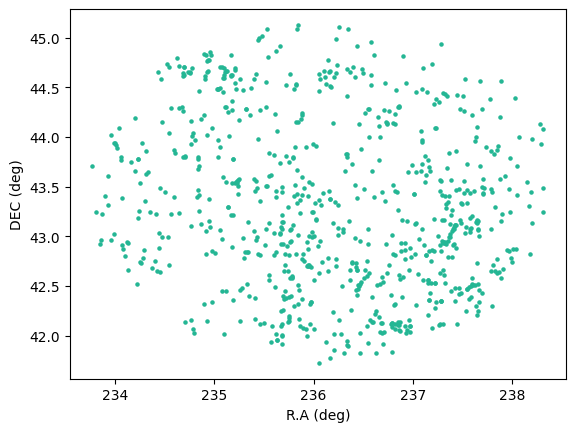

In [165]:
rosette(conditions[9],max_value_19[0],max_value_19[2])